In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
filename = 'titanic_data.csv'
data = pd.read_csv(filename)
clean_data = data.drop_duplicates() #清除重复行
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [3]:
clean_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print(len(clean_data))
clean_data.describe()

891


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 数据清理
1. 修改列名
2. 年龄的缺失值用均值填补
3. 发现Fare的标准差偏大,最大值远大于均值；核实数据的可靠性

* 修改列名

In [5]:
clean_data.columns = ['id', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked']
clean_data.head()

,id,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* 用年龄均值替换NaN

In [6]:
age_full = clean_data.age.fillna(29.7)
#age_full = clean_data['age'].fillna(29.7)
age_full.count()

891

* 核实fare列

In [7]:
# 找出数据点
clean_data.fare[clean_data.fare > 500]

258    512.3292
679    512.3292
737    512.3292
Name: fare, dtype: float64

In [8]:
# 读取数据点信息
clean_data.iloc[[258,679,737]]

,id,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


1. 结合存在多乘客拥有最高票价以及船票等级情况，以上信息初步排除票价的异常输入
2. 进一步发现最高票价乘客均从Cherbourg港口出发，因此可进一步探索船票等级和出发港口与票价的关系

In [9]:
#探索船票等级和出发港口与票价的关系
fare_max = clean_data.groupby(['pclass','embarked']).max()['fare']
print(fare_max.unstack(1))

fare_min = clean_data.groupby(['pclass','embarked']).min()['fare']
print(fare_min.unstack(1))

fare_mean = clean_data.groupby(['pclass','embarked']).mean()['fare']
print(fare_mean.unstack(1))

embarked         C       Q       S
pclass                            
1         512.3292  90.000  263.00
2          41.5792  12.350   73.50
3          22.3583  29.125   69.55
embarked        C      Q    S
pclass                       
1         26.5500  90.00  0.0
2         12.0000  12.35  0.0
3          4.0125   6.75  0.0
embarked           C          Q          S
pclass                                    
1         104.718529  90.000000  70.364862
2          25.358335  12.350000  20.327439
3          11.214083  11.183393  14.644083


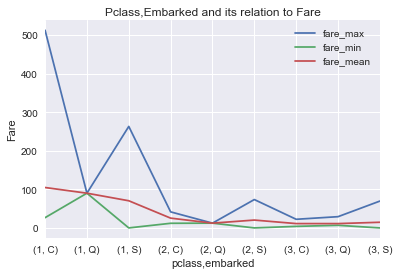

In [10]:
fare_max.plot(label='fare_max',legend=True)
fare_min.plot(label='fare_min',legend=True)
fare_mean.plot(label='fare_mean',legend=True)

plt.title('Pclass,Embarked and its relation to Fare')
plt.ylabel('Fare')

1. 票价均值呈现下降趋势，基本上可以确定票价 :'pclass':1 > 2 > 3,'embarked' = C > Q > S
2. 票价在(1,C),(1,S),(2,S),(3,S)中票价反差大，说明这几个区间内的乘客可能年龄或者身份地位差异明显，享受不同的票价优惠

# 探索泰坦尼克号乘客生存与哪些因素有关？

## 乘客性别与生存的关系

In [11]:
# 生存人数
survived_ple = clean_data.survived.value_counts()
survived_ple

0    549
1    342
Name: survived, dtype: int64

survived    0    1
sex               
female     81  233
male      468  109


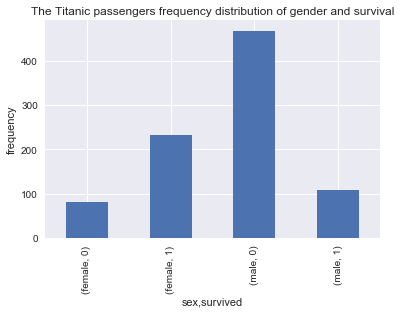

In [12]:
#乘客性别与生存的关系
sex_survived_frequency = clean_data.groupby('sex')['survived'].value_counts().sort_index()
print(sex_survived_frequency.unstack(1))

sex_survived_frequency.plot(kind='bar',)
plt.ylabel('frequency')
plt.title('The Titanic passengers frequency distribution of gender and survival')

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64


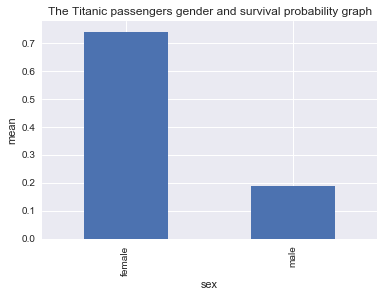

In [13]:
sex_survived_probability = clean_data.groupby('sex')['survived'].mean()
print(sex_survived_probability)

sex_survived_probability.plot(kind='bar')
plt.ylabel('mean')
plt.title('The Titanic passengers gender and survival probability graph')

1. 891名泰坦尼克号乘客死亡549人，生存342人。
2. 死亡乘客中，男性占468人，女性占81人，男性死亡人数较多。
3. 74.20%的女性乘客存活，18.89%的男性乘客存活，男性的存活率比女性低。

## 乘客票的等级与生存的关系

survived  False  True 
pclass                
1            80    136
2            97     87
3           372    119


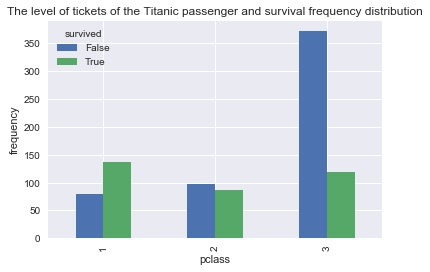

In [14]:
#乘客票的等级与生存的关系
pclass_survived_frequency = pd.crosstab(clean_data.pclass,clean_data.survived.astype(bool))
print(pclass_survived_frequency)

pclass_survived_frequency.plot(kind='bar')
plt.ylabel('frequency')
plt.title('The level of tickets of the Titanic passenger and survival frequency distribution')

pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64


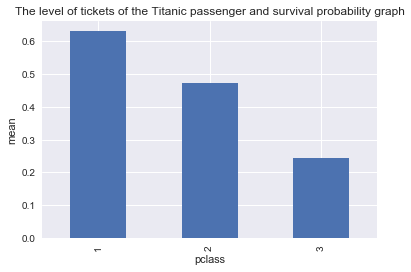

In [15]:
pclass_survived_probability = clean_data.groupby('pclass')['survived'].mean()
print(pclass_survived_probability)

pclass_survived_probability.plot(kind='bar')
plt.ylabel('mean')
plt.title('The level of tickets of the Titanic passenger and survival probability graph')

1. 1等票、2等票的死亡人数较少，三等票的死亡人数最多。
2. 1等票乘客生存率为62.96%，2等票乘客生存率为47.28%，三等票乘客生存率为24.24%

## 乘客的年龄与生存的关系

survived   False  True 
age_group              
0-10          24     38
10-20         61     41
20-30        143     77
30-40         94     73
40-50         55     34
>50          172     79


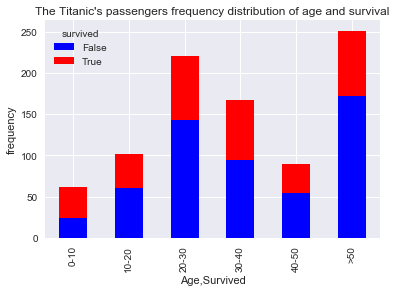

In [16]:
#乘客的年龄与生存的关系
def age_into_group(age):
    age_container = []
    for i in age:
        if i < 10:
            age_container.append('0-10')
        elif i < 20:
            age_container.append('10-20')
        elif i < 30:
            age_container.append('20-30')
        elif i < 40:
            age_container.append('30-40')
        elif i < 50 :
            age_container.append('40-50')
        else:
            age_container.append('>50')
    return pd.Series(age_container)

clean_data['age_group'] = age_into_group(clean_data.age)
age_survived_frequency = pd.crosstab(clean_data['age_group'],clean_data['survived'].astype(bool))
print(age_survived_frequency)

age_survived_frequency.plot(kind='bar',stacked=True,color=['blue','red'])
plt.xlabel('Age,Survived')
plt.ylabel('frequency')
plt.title('The Titanic\'s passengers frequency distribution of age and survival')

age_group
0-10     0.612903
10-20    0.401961
20-30    0.350000
30-40    0.437126
40-50    0.382022
>50      0.314741
Name: survived, dtype: float64


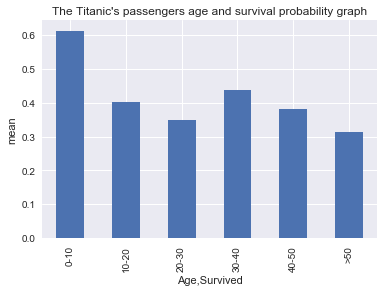

In [17]:
age_survived_probability = clean_data.groupby(clean_data['age_group'])['survived'].mean()
print(age_survived_probability)

age_survived_probability.plot(kind='bar')
plt.xlabel('Age,Survived')
plt.ylabel('mean')
plt.title('The Titanic\'s passengers age and survival probability graph')

1. >50岁年龄组的乘客死亡人数最多，其次为20-30岁年龄组的乘客。
2. 生存率最高的是10岁以下年龄组的乘客，>50岁年龄组和20-30岁年龄组乘客生存率最低。

## 乘客的性别、票的等级与生存的关系

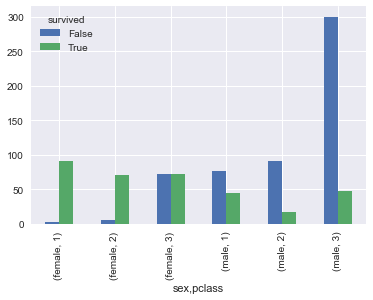

In [18]:
multiple_survived = pd.crosstab([clean_data.sex,clean_data.pclass],clean_data.survived.astype(bool))
multiple_survived.plot(kind='bar')

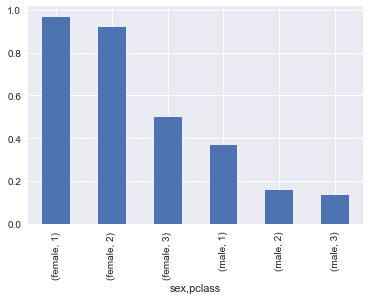

In [19]:
possibility = clean_data.groupby([clean_data.sex,clean_data.pclass]).survived.mean()
possibility.plot(kind='bar')

1. 1等票的女性死亡人数最少，三等票的男性死亡人数最多
2. 三等票女性的生存率比1等票男性的生存率高

# 结论
1. 泰坦尼克号乘客的生存情况与年龄、性别、船票等级存在相关性。
2. 女性死亡人数少于男性，生存率较高。
3. 船票等级高的乘客生存率明显高于船票等级低的乘客。
4. 20-30和>50年龄组的乘客死亡人数最高，年龄10岁以下的生存率最高。、
5. 三等船票的女性生存率高于一等船票的男性，表明性别较票等级对乘客生存率的影响大。